In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("HackRU_train.csv")

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25)

train, dev = train_test_split(train, test_size=0.25)

X_train = train.drop(["LowestRisk", "Id"],axis=1)
Y_train = train["LowestRisk"].to_frame()
X_dev  = dev.drop(["LowestRisk", "Id"],axis=1).copy()
Y_dev = dev["LowestRisk"].to_frame()

In [25]:
print(len(df))
print(len(test))
print(len(train))
print(len(dev))

47504
11876
26721
8907


In [26]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26721 entries, 23475 to 23648
Columns: 127 entries, Unnamed: 0 to Approved
dtypes: float64(18), int64(109)
memory usage: 26.1 MB


In [27]:
print(X_dev)

       Unnamed: 0  Product_Info_1  Product_Info_3  Product_Info_4  \
25837       51316               1              26        0.051282   
22634       20997               1              26        0.282051   
37099       14706               1              26        0.743590   
35594       25243               1              26        0.230769   
27679       19132               1              10        0.230769   
16112        1337               1              26        0.086176   
7974        13031               1              26        1.000000   
38115       14168               1              26        0.487179   
15060       36691               1              26        0.743590   
37184        7438               1              15        0.076923   
11139       39130               1              26        0.743590   
35297       16459               1              31        0.487179   
28027       27660               1              26        0.384615   
35768       52127               1 

In [28]:
from sklearn.metrics import classification_report
# get the Classifier algorithm instance
clf = KNeighborsClassifier(n_neighbors=2)
#fit the data
clf.fit(X_train.values, Y_train.values)
#get the score
accuracy = clf.score(X_dev, Y_dev)
#print the accuaracy

print("Mean accuracy on dev set for 2 =  %s" % (accuracy))

result = clf.predict(X_dev)
print (classification_report(Y_dev, result))

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Mean accuracy on dev set for 2 =  0.634669361177
             precision    recall  f1-score   support

          0       0.67      0.88      0.76      5935
          1       0.38      0.14      0.21      2972

avg / total       0.57      0.63      0.58      8907



In [29]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train.values,Y_train.values)

accu = rf.score(X_dev, Y_dev)
print("Mean accuracy on dev set for 2 =  %s" % (accu))

result3 = rf.predict(X_dev)
print (classification_report(Y_dev, result3))

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean accuracy on dev set for 2 =  0.857640058381
             precision    recall  f1-score   support

          0       0.89      0.89      0.89      5935
          1       0.79      0.79      0.79      2972

avg / total       0.86      0.86      0.86      8907



In [40]:
probs = rf.predict_proba(X_dev)
print("Probabilities :", probs)
print("RSquare :",metrics.accuracy_score(Y_dev,rf.predict(X_dev)))

Probabilities : [[ 0.98   0.02 ]
 [ 0.025  0.975]
 [ 0.545  0.455]
 ..., 
 [ 0.9    0.1  ]
 [ 0.945  0.055]
 [ 0.82   0.18 ]]
RSquare : 0.857640058381


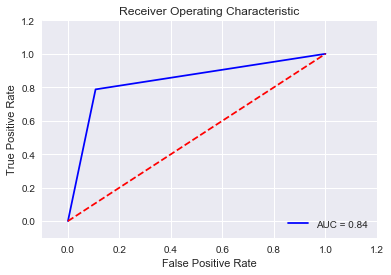

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(Y_dev,rf.predict(X_dev))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10)
model.fit(X_train.values,Y_train.values)
acc = model.score(X_dev, Y_dev)
print("Mean accuracy on dev set for 2 =  %s" % (acc))

#result4 = model.predict(X_dev.values[1])
#print (classification_report(Y_dev.values[1], result4))

result4 = model.predict(X_dev)
print (classification_report(Y_dev, result4))

C:\Users\Ayush\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean accuracy on dev set for 2 =  0.75749410576
             precision    recall  f1-score   support

          0       0.78      0.89      0.83      5935
          1       0.69      0.49      0.58      2972

avg / total       0.75      0.76      0.75      8907



In [38]:
probs = model.predict_proba(X_dev)
print("Probabilities :", probs)
print("RSquare :",metrics.accuracy_score(Y_dev,model.predict(X_dev)))

Probabilities : [[ 0.94401741  0.05598259]
 [ 0.37562851  0.62437149]
 [ 0.86636499  0.13363501]
 ..., 
 [ 0.8804448   0.1195552 ]
 [ 0.68411016  0.31588984]
 [ 0.9736874   0.0263126 ]]
RSquare : 0.75749410576


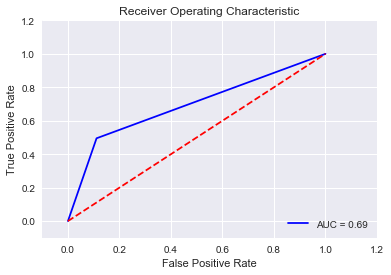

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(Y_dev,model.predict(X_dev))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()